##**ACTIVIDAD: problema de fuga de clientes**
####**Grupo 9:**

*   Angie Catherine Collazos Valenzuela
*   José Munévar Diaz
*   Iván Valderrama Corredor

####**ENTENDIMIENTO DE LOS DATOS**

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset (ajusta la ruta si lo tienes local)
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

# Cargar dataset
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Ver las primeras filas
print(df.shape)
df.head()


Path to dataset files: /kaggle/input/telco-customer-churn
(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Aqui tenemos un panorama de la base de datos a usar, con la variable CHURN, con valores de "yes" y "no"

In [2]:

shape = df.shape
shape

(7043, 21)

tenemos un total de 7043 registros con 21 atributos incluido la variable clase

In [3]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [4]:
print(df.dtypes.value_counts())  # cuántas variables son object (categóricas) y cuántas numéricas

object     18
int64       2
float64     1
Name: count, dtype: int64


In [5]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Podemos observar que tenemos variables de tipo object, int, float, en este caso para las hipotesis de los modelos de arboles de decision y bosque aleatorio sera necesario codificarlas, SVM y perceptron necesitan conversion y escalado

In [6]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Se puede observar que no existen valores nulos en la data, sin embargo se habla de que la mayoria de datos son tipo texto, entonces es necesario explorar entre valores numericos y valores de tipo int

In [7]:

print(df.describe())       # Numéricas
print(df.describe(include="object"))  # Categóricas


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3          

Podemos observar que las estadisticas descriptivas para las variables numericas y los valores unicos y sus frecuencias para las variables categoricas , dentro de eso vemos que hay variables binarias y variables categoricas nominales, ademas observamos que la variable total charges , se toma como object siendo float, es necesario revuisarla

In [8]:
for col in df.select_dtypes(include="object").columns:
    print(col, ":", df[col].mode()[0])


customerID : 0002-ORFBO
gender : Male
Partner : No
Dependents : No
PhoneService : Yes
MultipleLines : No
InternetService : Fiber optic
OnlineSecurity : No
OnlineBackup : No
DeviceProtection : No
TechSupport : No
StreamingTV : No
StreamingMovies : No
Contract : Month-to-month
PaperlessBilling : Yes
PaymentMethod : Electronic check
TotalCharges :  
Churn : No


In [9]:
# Revisar el tipo de dato
print(df['TotalCharges'].dtype)

# Revisar valores únicos "problemáticos"
print(df['TotalCharges'].unique()[:20])  # primeros 20 valores únicos



object
['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95' '587.45' '326.8' '5681.1' '5036.3' '2686.05'
 '7895.15' '1022.95' '7382.25' '528.35' '1862.9']


In [10]:
# Revisar si hay valores vacíos (espacios en blanco)
print(df['TotalCharges'].isnull().sum())  # detecta nulos como NaN
print((df['TotalCharges'] == " ").sum())  # detecta si hay espacios en blanco

0
11


In [11]:
#observamos que los valores como espacios en blanco afectan el tipo de la variables, es necesario limpiar e imputar
# Reemplazar espacios en blanco por NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", pd.NA)

# Convertir a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Verificar valores nulos
print(df['TotalCharges'].isnull().sum())


11


In [12]:
#siendo solo 11 valores se decide eiminar
df = df.dropna(subset=['TotalCharges'])


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [14]:
#Balanceo
print(df["Churn"].value_counts())
print(df["Churn"].value_counts(normalize=True))


Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


podemos observar que la data esta desbalanceada , para SVM y Redes requieren SMOTE o undersampling, en el caso de Árboles de decision y bosque aleatorio pueden manejarlo, pero se recomienda balancear.

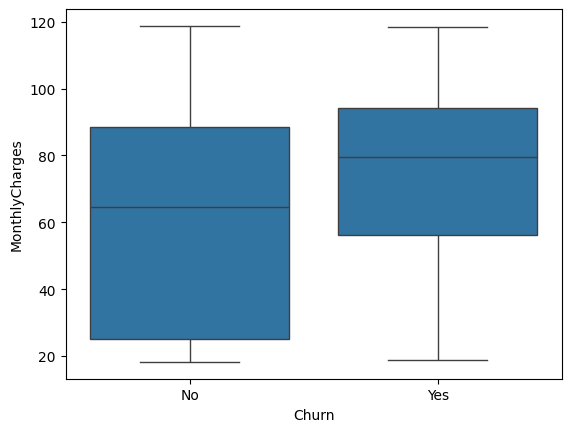

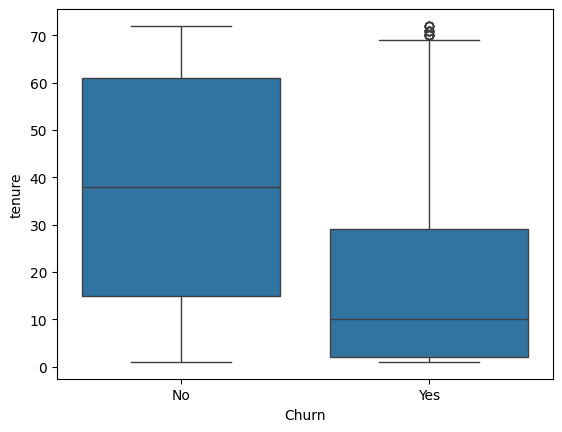

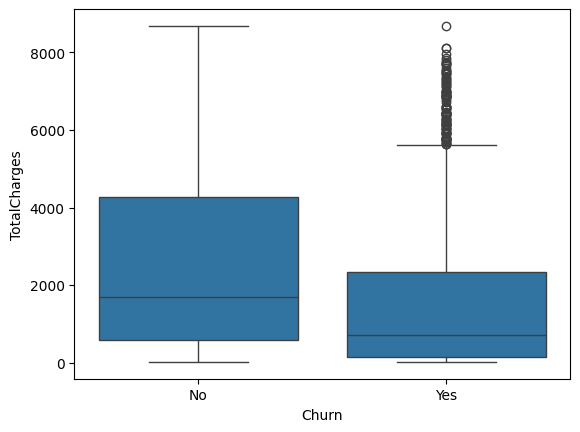

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.show()

sns.boxplot(data=df, x="Churn", y="tenure")
plt.show()

sns.boxplot(data=df, x="Churn", y="TotalCharges")
plt.show()


Podemos observar que no hay presencia de muchos valores atípicos, y podemos observar en estas variables comportamientos entre clases referente a la variable clase CHURN, importante si se quiere trabajar con SVM, arboles de decisionn y bosque aleatorio

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487 



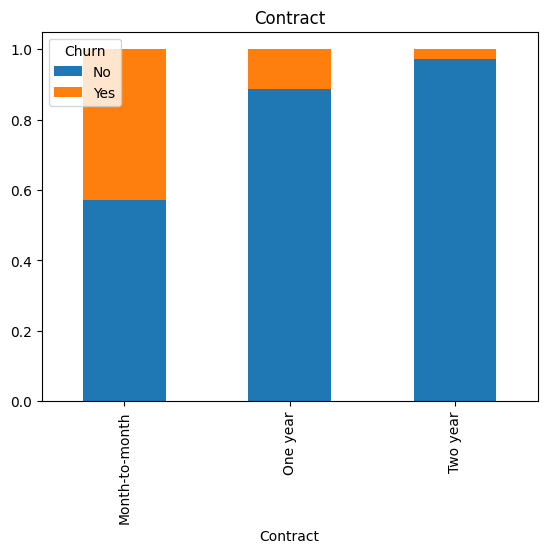

Churn                  No       Yes
InternetService                    
DSL              0.810017  0.189983
Fiber optic      0.581072  0.418928
No               0.925658  0.074342 



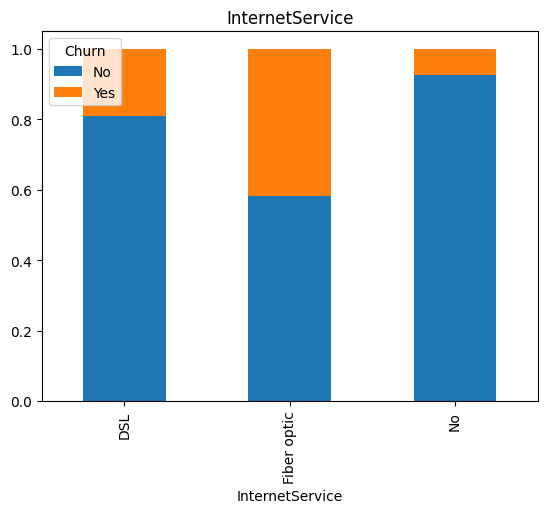

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832685  0.167315
Credit card (automatic)    0.847469  0.152531
Electronic check           0.547146  0.452854
Mailed check               0.807980  0.192020 



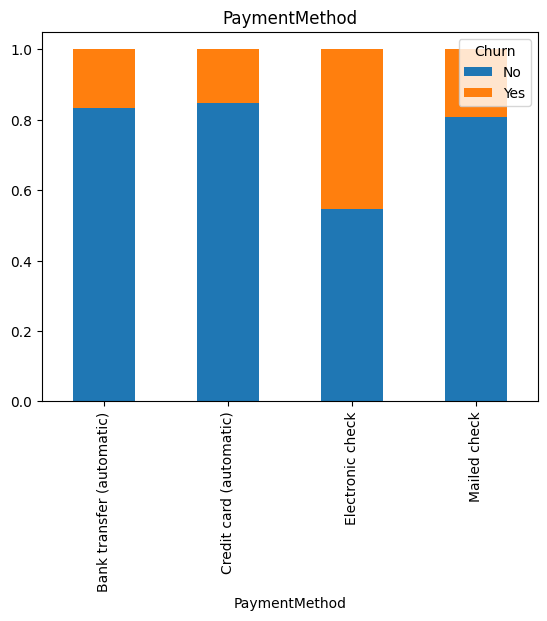

In [16]:
categorical_cols = ["Contract", "InternetService", "PaymentMethod"]

for col in categorical_cols:
    ct = pd.crosstab(df[col], df["Churn"], normalize="index")
    print(ct, "\n")
    ct.plot(kind="bar", stacked=True, title=col)
    plt.show()


Podemos observar la importancia de estas variables que nos muestran lineas de division relevantes

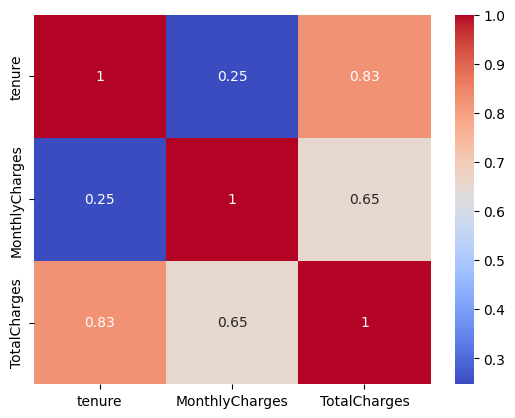

In [17]:
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm")
plt.show()


###**Crítica de las Hipótesis**

####**Hipótesis 1: Árbol de decisión**:

El dataset cuenta con 17 variables categóricas y 4 numéricas (2 float y 2 int).La variable objetivo Churn es binaria (No = 5163, Yes = 1869), lo cual confirma que se trata de un problema de clasificación binaria.
Existe cierto desbalance de clases (aprox. 73% No vs. 27% Sí), lo cual puede afectar al árbol si no se consideran técnicas de balanceo o métricas adecuadas.

**Parámetros**: El árbol de decisión requiere estimar parámetros como:
max_depth (profundidad máxima del árbol, controla el sobreajuste),
min_samples_split y min_samples_leaf (tamaño mínimo de muestra para dividir un nodo y para considerarlo hoja),
criterion (métrica de impureza: Gini o Entropía).

Estos parámetros sí pueden estimarse con el dataset actual, ya que hay suficiente número de observaciones (7032 clientes)

**Entrada:** todas las variables explicativas (categóricas transformadas a numéricas + variables numéricas).

**Salida:** variable Churn (Sí/No).

El árbol puede procesar tanto variables categóricas como numéricas (tras la codificación adecuada), por lo que la técnica es compatible con los datos.

**Evaluación del modelo:** Es posible realizar una evaluación objetiva usando métricas de clasificación: Accuracy (exactitud general),Precision (qué tan confiables son las predicciones positivas), Recall (qué tanto detecta la clase minoritaria, Churn), F1-Score (balance entre precisión y recall)., ROC-AUC (mide la capacidad del modelo para separar ambas clases).
Dado el desbalance de clases, métricas como Recall, F1 y ROC-AUC son más relevantes que Accuracy.

**Requisitos de preparación de datos**: Encoding: convertir variables categóricas (object) a numéricas (ejemplo: LabelEncoder o OneHotEncoder).
Balanceo de clases: dado que Churn está desbalanceado, conviene usar técnicas como class_weight="balanced" en el árbol O aplicar SMOTE (sobremuestreo de la clase minoritaria).

**Conclusión:**
El árbol de decisión es aplicable al problema, es fácil de interpretar al generar reglas de decisión claras, los datos cumplen los requisitos mínimos para implementarlo, requiere encoding de categóricas y balanceo de clases para mejorar el desempeño, puede sobreajustar si no se controla la profundidad y tamaño de nodos.

###**Hipótesis 2: Random Forest:**

El Dataset tiene 7032 registros, 17 variables categóricas, 4 numéricas (2 float, 2 int).

**Variable objetivo:** Churn (binaria, desbalanceada: 73% No vs. 27% Sí)

Random Forest puede trabajar con este dataset porque maneja variables categóricas, es robusto frente a outliers y ruido, captura relaciones no lineales y complejas entre variables, algo que un árbol simple no siempre logra.

**Parámetros a estimar:** n_estimators: número de árboles en el bosque, criterion: función de impureza (Gini, Entropía), max_depth: profundidad máxima de cada árbol, max_features: número máximo de variables consideradas en cada división (importante para reducir correlación entre árboles), min_samples_split y min_samples_leaf: controlan tamaño mínimo de nodos, bootstrap: si usar muestreo con reemplazo para entrenar cada árbol, OOB Score (Out-of-Bag): permite evaluar el modelo sin necesidad de usar validación cruzada en algunos casos.
 Con 7032 observaciones, es posible estimar estos hiperparámetros de forma confiable (usando validación cruzada o RandomizedSearchCV / Optuna).

**Entrada:** todas las variables (categóricas transformadas + numéricas).

**Salida:** Churn (Sí/No).

Random Forest soporta perfectamente este esquema, incluso si hay correlación entre variables.

**Requisitos de preparación de datos**: Encoding: igual que en el árbol de decisión (OneHot o Label Encoding), Balanceo de clases: necesario, porque el bosque podría sesgarse hacia la clase mayoritaria, Técnicas de sobremuestreo (SMOTE).


**Evaluación de la hipótesis**

Al ser un modelo más robusto que un solo árbol, se espera un mejor desempeño general, Métricas a usar seran igual que en arboles de decisión pero con más peso en Recall y ROC-AUC por el desbalance.

También es posible evaluar importancia de variables para interpretar qué factores explican más el Churn.

**Conclusión**

Random Forest es aplicable al problema y probablemente supere en desempeño al Árbol de Decisión, sus ventajas, reduce sobreajuste al promediar múltiples árboles, puede capturar relaciones más complejas, permite evaluar importancia de variables.
Sus desventajas: Menos interpretable que un solo árbol, requiere más recursos computacionales.

###**Hipótesis 3: Máquina de vectores de soporte:**


**Variable objetivo:** Churn (desbalanceada: 73% No vs 27% Sí)

SVM es adecuado para clasificación binaria, pero escala mal con datasets grandes (entrenar sobre >5000 observaciones puede ser costoso, aunque manejable con kernels lineales), requiere que los datos numéricos estén escalados y necesita codificación de variables categóricas.

El dataset es moderado (7032 registros), por lo que se puede aplicar SVM con un kernel lineal o radial (RBF), pero habrá que medir bien el tiempo de cómputo.

**Parámetros a estimar (hiperparámetros importantes)**
C: controla la regularización, kernel: función de transformación (lineal, RBF, polinomial, sigmoidal), gamma: aplica en kernels RBF/polinomiales, controla la influencia de un solo punto de entrenamiento.

Con validación cruzada y búsqueda de hiperparámetros (GridSearchCV u Optuna) se pueden estimar de forma confiable.

**Entrada:** variables numéricas escaladas + categóricas transformadas.

**Salida:** Churn (Sí/No).

El modelo es compatible, pero requiere preprocesamiento más estricto que los árboles.

**Requisitos de preparación de datos:** Encoding: necesario, Escalado: obligatorio (MinMaxScaler, StandardScaler), porque SVM usa distancias, Balanceo de clases: importante, porque SVM es sensible al desbalance, Outliers: pueden afectar mucho, se recomienda detectar y tratarlos.

**Evaluación de la hipótesis:** SVM puede lograr alta precisión en fronteras complejas, pero es más difícil de interpretar, dentro de las métricas recomendadas estan Recall, ROC-AUC, F1 (porque dataset está desbalanceado).

Dado que es más pesado computacionalmente, podría no escalar tan bien como Random Forest en este dataset.

**Conclusión**
Sí se puede aplicar SVM para el problema de Churn, pero con condiciones: Se deben escalar las variables, se debe balancear la clase minoritaria, Hay que elegir bien el kernel según los datos (lineal o RBF son los más comunes).


###**Hipótesis 4: Perceptrón Multicapa**

**Variable objetivo:** Churn (desbalanceada: 73% No vs 27% Sí).

El MLP es adecuado porque puede aprender relaciones no lineales y complejas entre variables categóricas y numéricas pero requiere mucho preprocesamiento y más tiempo de entrenamiento que árboles o SVM.

**Parámetros a estimar (hiperparámetros importantes):** hidden_layer_sizes: número de capas y neuronas, activation: función de activación, solver: optimizador, alpha: regularización (controla sobreajuste), learning_rate: tasa de aprendizaje, max_iter: número máximo de iteraciones.
Requiere validación cruzada para encontrar la mejor combinación.

**Entrada:** variables numéricas escaladas + categóricas codificadas.
**Salida:** probabilidad de Churn Sí/No.

Compatible, pero requiere OneHotEncoder para categóricas, Escalado

**Requisitos de preparación de datos:** Encoding: necesario (OneHot para categóricas), Escalado: obligatorio, porque redes neuronales funcionan mejor cuando los datos están en el mismo rango, Balanceo de clases: importante Normalización: recomendable para convergencia estable.

**Evaluación de la hipótesis:** MLP es poderoso pero más difícil de interpretar que árboles, tiende a sobreajustar con pocos datos o sin regularización.

Métricas recomendadas: ROC-AUC, F1, Recall (porque dataset está desbalanceado).

**Conclusión**
Sí es posible aplicar un MLP, puede detectar patrones complejos pero es menos interpretable, más costoso computacionalmente, requiere mucho preprocesamiento.

Para este dataset no muy grande, un MLP podría funcionar bien, pero no necesariamente mejor que Random Forest o SVM.

###**Elección de los Modelos**